## CLICKSTREAM CUSTOMER CONVERSION ANALYSIS...

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score



### Phase 1 - Data Understanding ###

In [2]:


# Load the dataset (update the path if needed)
data = pd.read_csv("/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/train_data.csv")
df = data.copy()

#  View the first few rows
print("Preview of dataset:")
df.head()


Preview of dataset:


,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [3]:
# Check the structure of the data
print("\nColumn Names:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)



Column Names:
Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

Data Types:
year                     int64
month                    int64
day                      int64
order                    int64
country                  int64
session_id               int64
page1_main_category      int64
page2_clothing_model    object
colour                   int64
location                 int64
model_photography        int64
price                    int64
price_2                  int64
page                     int64
dtype: object


In [4]:
# Basic info summary
print("\nDataset Info:")
df.describe()


Dataset Info:


,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
mean,2008.0,5.582759,14.507671,9.811314,26.949629,12038.722063,2.400426,6.227393,3.261106,1.260026,43.788191,1.488484,1.712137
std,0.0,1.328064,8.829106,13.458937,7.153071,7012.460866,1.145004,4.238354,1.714058,0.438650,12.539390,0.499869,0.983699
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5905.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11931.000000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18212.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64


In [6]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

In [7]:
# Step 1: List of categorical columns to convert
categorical_cols = [
    'country',
    'page1_main_category',
    'page2_clothing_model',
    'colour',
    'location',
    'model_photography',
    'price_2'
]

# Step 2: Convert them to object type (categorical representation)
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Step 3: (Optional) Rename columns for clarity
df.rename(columns={
    'page1_main_category': 'main_category',
    'page2_clothing_model': 'clothing_model',
    'model_photography': 'photo_type',
    'price_2': 'price_above_avg'
}, inplace=True)

# Check updated column types
print("\nUpdated Data Types:")
print(df.dtypes)



Updated Data Types:
year                int64
month               int64
day                 int64
order               int64
country            object
session_id          int64
main_category      object
clothing_model     object
colour             object
location           object
photo_type         object
price               int64
price_above_avg    object
page                int64
dtype: object


Summary of Numeric Columns:
           year          month            day          order     session_id  \
count  132379.0  132379.000000  132379.000000  132379.000000  132379.000000   
mean     2008.0       5.582759      14.507671       9.811314   12038.722063   
std         0.0       1.328064       8.829106      13.458937    7012.460866   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000    5905.000000   
50%      2008.0       5.000000      14.000000       6.000000   11931.000000   
75%      2008.0       7.000000      22.000000      12.000000   18212.000000   
max      2008.0       8.000000      31.000000     195.000000   24026.000000   

               price           page  
count  132379.000000  132379.000000  
mean       43.788191       1.712137  
std        12.539390       0.983699  
min        18.000000       1.000000  
25%        33.000000       1.000000  
50%        43.000000       1.000

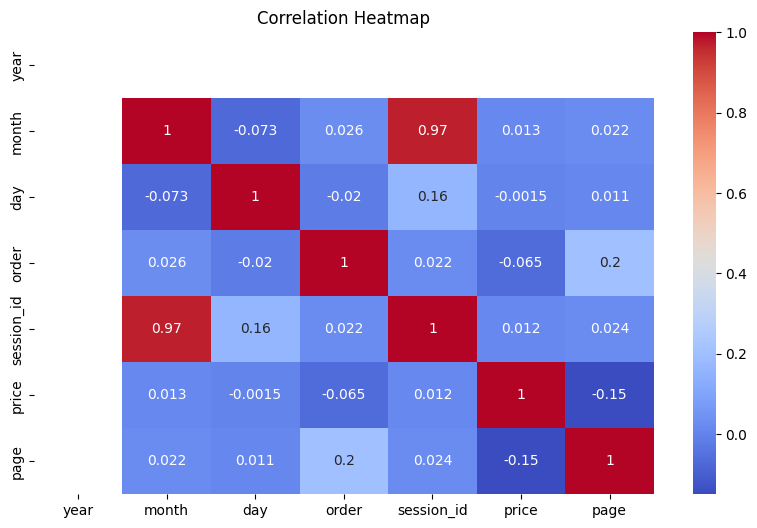

In [8]:
# Convert encoded categorical columns to string type for analysis
categorical_cols = ['country', 'main_category', 'clothing_model', 'colour', 'location', 'photo_type', 'price_above_avg']
for col in categorical_cols:
    df[col] = df[col].astype(str)

# 1. Summary statistics for numeric columns
print("Summary of Numeric Columns:")
print(df.describe())

# 2. Value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())

# 3. Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [9]:


# Convert date-related columns to datetime for time-based EDA
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Add day_of_week and hour as derived time features
df['day_of_week'] = df['date'].dt.day_name()

# ----------- Plotly Heatmap for numeric correlation -----------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

fig = px.imshow(corr_matrix,
                text_auto=True,
                title="Correlation Heatmap (Numeric Features)",
                color_continuous_scale='RdBu_r')

fig.update_layout(
       width=900,  # Set the width in pixels
       height=600, # Set the height in pixels
   )
fig.show()



### Session id and month are hihly co related.

## Lets map the original data to the encoded representation of the data in the table so that when we do the EDA its better to find the insights.

In [10]:
country_map = {"1": "Australia", "2":"Austria","3":"Belgium","4":"British Virgin Islands","5":"Cayman Islands","6":"Christmas Island","7":"Croatia","8":"Cyprus","9":"Czech Republic",
"10":"Denmark","11":"Estonia","12":"unidentified","13":"Faroe Islands","14":"Finland","15":"France","16":"Germany","17":"Greece","18":"Hungary","19":"Iceland","20":"India","21":"Ireland","22":"Italy","23":"Latvia","24":"Lithuania","25":"Luxembourg",
"26":"Mexico","27":"Netherlands","28":"Norway","29":"Poland","30":"Portugal","31":"Romania","32":"Russia","33":"San Marino","34":"Slovakia","35":"Slovenia","36":"Spain",
"37":"Sweden","38":"Switzerland","39":"Ukraine","40":"United Arab Emirates","41":"United Kingdom","42":"USA","43":"biz (.biz)" ,"44":"com (.com)","45":"int (.int)" ,"46":"net (.net)",
"47":"org (*.org)"
}

main_category_map = {
    '1': 'Trousers',
    '2': 'Skirts',
    '3': 'Blouses',
    '4': 'Sale'
}

colour_map = {
    '1': 'Beige', '2': 'Black', '3': 'Blue', '4': 'Brown',
    '5': 'Burgundy', '6': 'Gray', '7': 'Green', '8': 'Navy Blue',
    '9': 'Multicolor', '10': 'Olive', '11': 'Pink', '12': 'Red',
    '13': 'Violet', '14': 'White'
}

location_map = {
    '1': 'Top Left', '2': 'Top Middle', '3': 'Top Right',
    '4': 'Bottom Left', '5': 'Bottom Middle', '6': 'Bottom Right'
}

photo_type_map = {
    '1': 'Front View',
    '2': 'Profile View'
}

price_avg_map = {
    '1': 'Above Average',
    '2': 'Below Average'
}

# Apply the mappings
df['country'] = df['country'].map(country_map)
df['main_category'] = df['main_category'].map(main_category_map)
df['colour'] = df['colour'].map(colour_map)
df['location'] = df['location'].map(location_map)
df['photo_type'] = df['photo_type'].map(photo_type_map)
df['price_above_avg'] = df['price_above_avg'].map(price_avg_map)


In [11]:
df

,year,month,day,order,country,session_id,main_category,clothing_model,colour,location,photo_type,price,price_above_avg,page,date,day_of_week
0,2008,6,22,21,Poland,15648,Blouses,C20,Violet,Top Left,Profile View,48,Above Average,2,2008-06-22,Sunday
1,2008,5,19,6,Poland,10018,Skirts,B26,Violet,Top Right,Front View,57,Above Average,2,2008-05-19,Monday
2,2008,7,15,2,Poland,19388,Blouses,C13,Multicolor,Bottom Middle,Front View,48,Above Average,1,2008-07-15,Tuesday
3,2008,5,2,2,Poland,7181,Skirts,B11,Black,Bottom Left,Front View,43,Below Average,1,2008-05-02,Friday
4,2008,6,9,16,Poland,13493,Skirts,B31,Multicolor,Bottom Middle,Front View,57,Above Average,2,2008-06-09,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,Poland,17622,Sale,P19,Black,Top Left,Front View,48,Above Average,2,2008-07-04,Friday
132375,2008,6,19,9,Poland,15165,Blouses,C26,White,Top Right,Front View,28,Below Average,2,2008-06-19,Thursday
132376,2008,7,15,4,Poland,19359,Trousers,A4,Blue,Top Middle,Profile View,38,Below Average,1,2008-07-15,Tuesday
132377,2008,7,28,16,Poland,21454,Blouses,C50,Multicolor,Bottom Middle,Profile View,20,Below Average,3,2008-07-28,Monday


In [12]:
# ----------- Time-based EDA: Clicks by Day of Week -----------
clicks_by_day = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

fig2 = px.bar(
    x=clicks_by_day.index,
    y=clicks_by_day.values,
    labels={'x': 'Day of Week', 'y': 'Number of Clicks'},
    title="Clicks by Day of the Week"
)
fig2.show()

# ----------- Time-based EDA: Clicks by Month -----------
clicks_by_month = df['month'].value_counts().sort_index()

fig3 = px.bar(
    x=clicks_by_month.index,
    y=clicks_by_month.values,
    labels={'x': 'Month', 'y': 'Number of Clicks'},
    title="Clicks by Month"
)
fig3.show()





In [13]:

# Get top 10 countries by total clicks
top_countries = df['country'].value_counts().nlargest(10).index

# Filter data for only those top countries
df_top_countries = df[df['country'].isin(top_countries)]

# Group by country and product category to count clicks
category_country = df_top_countries.groupby(['country', 'main_category']).size().reset_index(name='clicks')

# Plot using Plotly
fig = px.bar(category_country,
             x='country', y='clicks', color='main_category',
             title='Top Product Categories by Top 10 Countries',
             labels={'clicks': 'Number of Clicks'},
             barmode='group')
fig.show()


In [14]:
location_clicks = df['location'].value_counts().reset_index()
location_clicks.columns = ['location', 'clicks']

fig2 = px.pie(location_clicks,
              values='clicks', names='location',
              title='Click Distribution by Screen Location')
fig2.show()

In [15]:

# Group by product category and price level
category_price_level = df.groupby(['main_category', 'price_above_avg']).size().reset_index(name='count')

# Plot a grouped bar chart
fig = px.bar(category_price_level,
             x='main_category', y='count', color='price_above_avg',
             barmode='group',
             title='Price Level of Each Product Category',
             labels={'count': 'Number of Products', 'price_above_avg': 'Price Position'})
fig.show()


In [16]:
# Count clicks by clothing model and category
model_category = df.groupby(['clothing_model', 'main_category']).size().reset_index(name='clicks')

# Get top 10 most clicked models overall
top_model_names = model_category.groupby('clothing_model')['clicks'].sum().nlargest(10).index

# Filter only top models
top_model_category = model_category[model_category['clothing_model'].isin(top_model_names)]

# Plot grouped horizontal bar chart
fig = px.bar(top_model_category,
             x='clicks', y='clothing_model', color='main_category',
             orientation='h',
             title='Top 10 Most Viewed Clothing Models with Category',
             labels={'clicks': 'Number of Clicks', 'clothing_model': 'Model'})
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()



In [17]:
# Sum total clicks (order) grouped by category and photo type
photo_category = df.groupby(['main_category', 'photo_type'])['order'].sum().reset_index(name='clicks')

fig = px.bar(photo_category,
             x='main_category', y='clicks', color='photo_type',
             barmode='group',
             title='Clicks by Photo Type per Product Category',
             labels={'clicks': 'Total Clicks'})
fig.show()


In [18]:


# Reuse price binning if not already done
df['price_range'] = pd.cut(df['price'],
                           bins=[0, 25, 50, 75, 100, 200],
                           labels=['0-25', '26-50', '51-75', '76-100', '100+'])

# Group and sum clicks
price_line = df.groupby(['price_range', 'main_category'])['order'].sum().reset_index(name='clicks')

# Sort price_range as categorical for proper plotting
price_line['price_range'] = pd.Categorical(price_line['price_range'],
                                           categories=['0-25', '26-50', '51-75', '76-100', '100+'],
                                           ordered=True)

# Plot line graph
fig = px.line(price_line,
              x='price_range', y='clicks', color='main_category',
              markers=True,
              title='Clicks by Price Range per Product Category (Line Chart)',
              labels={'clicks': 'Total Clicks', 'price_range': 'Price Range'})
fig.show()



/var/folders/q9/1vgcrp_s61j9_p6vmrcdf1h00000gn/T/ipykernel_5486/1792064837.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [19]:
# Sum clicks (order) by page
page_clicks = df.groupby('page')['order'].sum().reset_index(name='clicks')

fig3 = px.bar(page_clicks,
              x='page', y='clicks',
              title='Total Clicks per Website Page',
              labels={'page': 'Page Number', 'clicks': 'Total Clicks'})
fig3.show()


In [20]:
# Group by session and category, summing clicks (order)
session_category_clicks = df.groupby(['session_id', 'main_category'])['order'].sum().reset_index(name='clicks')

# Scatter plot
fig = px.scatter(session_category_clicks,
                 x='session_id',
                 y='clicks',
                 color='main_category',
                 size='clicks',
                 title='Clicks per Session by Product Category (Scatter Plot)',
                 labels={'clicks': 'Total Clicks', 'session_id': 'Session ID'})
fig.update_layout(showlegend=True)
fig.show()



## Outlier Detection 

In [21]:

# List of numeric columns to check
num_cols = ['order', 'price', 'page']

# Check outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    print(f"{col}: {outlier_count} outliers detected")


order: 9212 outliers detected
price: 1542 outliers detected
page: 9390 outliers detected


In [22]:
# List of numeric columns to plot
numeric_cols = ['order', 'price', 'page']

# Generate boxplots for each
for col in numeric_cols:
    fig = px.box(df, y=col, title=f'Box Plot for {col.capitalize()}',
                 points="outliers",  # Show outlier dots
                 labels={col: col.capitalize()})
    fig.show()


### Creating the target variable for the classification 


In [23]:
# Example threshold: if order > 10, assume purchase
df['purchase'] = df['order'].apply(lambda x: 1 if x > 12 else 2)  # 1 = Purchased, 2 = Not Purchased
df


,year,month,day,order,country,session_id,main_category,clothing_model,colour,location,photo_type,price,price_above_avg,page,date,day_of_week,price_range,purchase
0,2008,6,22,21,Poland,15648,Blouses,C20,Violet,Top Left,Profile View,48,Above Average,2,2008-06-22,Sunday,26-50,1
1,2008,5,19,6,Poland,10018,Skirts,B26,Violet,Top Right,Front View,57,Above Average,2,2008-05-19,Monday,51-75,2
2,2008,7,15,2,Poland,19388,Blouses,C13,Multicolor,Bottom Middle,Front View,48,Above Average,1,2008-07-15,Tuesday,26-50,2
3,2008,5,2,2,Poland,7181,Skirts,B11,Black,Bottom Left,Front View,43,Below Average,1,2008-05-02,Friday,26-50,2
4,2008,6,9,16,Poland,13493,Skirts,B31,Multicolor,Bottom Middle,Front View,57,Above Average,2,2008-06-09,Monday,51-75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,Poland,17622,Sale,P19,Black,Top Left,Front View,48,Above Average,2,2008-07-04,Friday,26-50,2
132375,2008,6,19,9,Poland,15165,Blouses,C26,White,Top Right,Front View,28,Below Average,2,2008-06-19,Thursday,26-50,2
132376,2008,7,15,4,Poland,19359,Trousers,A4,Blue,Top Middle,Profile View,38,Below Average,1,2008-07-15,Tuesday,26-50,2
132377,2008,7,28,16,Poland,21454,Blouses,C50,Multicolor,Bottom Middle,Profile View,20,Below Average,3,2008-07-28,Monday,0-25,1


In [24]:
# Drop only the specified date-related columns
df.drop(columns=['year', 'day', 'date','month','day_of_week'], inplace=True)
df.columns

Index(['order', 'country', 'session_id', 'main_category', 'clothing_model',
       'colour', 'location', 'photo_type', 'price', 'price_above_avg', 'page',
       'price_range', 'purchase'],
      dtype='object')

### Feature Engineering - creating columns to identify patterns
* creating 5 new columns 

In [25]:
# 1. session_clicks: Max clicks (order) per session
session_clicks = df.groupby('session_id')['order'].max()
df['session_clicks'] = df['session_id'].map(session_clicks)

# 2. clicks_per_category: Clicks per session-category combo
category_clicks = df.groupby(['session_id', 'main_category'])['order'].sum().reset_index()
category_clicks.rename(columns={'order': 'clicks_per_category'}, inplace=True)

# Merge back to main df
df = df.merge(category_clicks, on=['session_id', 'main_category'], how='left')

# 3. bounce: Single-click sessions
df['bounce'] = (df['order'] == 1).astype(int)

# 4. is_high_price: Price > 75th percentile
price_cutoff = df['price'].quantile(0.75)
df['is_high_price'] = (df['price'] > price_cutoff).astype(int)

# 5. click_efficiency: Clicks per page
df['click_efficiency'] = df['order'] / df['page'].replace(0, np.nan)

df

,order,country,session_id,main_category,clothing_model,colour,location,photo_type,price,price_above_avg,page,price_range,purchase,session_clicks,clicks_per_category,bounce,is_high_price,click_efficiency
0,21,Poland,15648,Blouses,C20,Violet,Top Left,Profile View,48,Above Average,2,26-50,1,107,2029,0,0,10.500000
1,6,Poland,10018,Skirts,B26,Violet,Top Right,Front View,57,Above Average,2,51-75,2,13,65,0,1,3.000000
2,2,Poland,19388,Blouses,C13,Multicolor,Bottom Middle,Front View,48,Above Average,1,26-50,2,11,15,0,0,2.000000
3,2,Poland,7181,Skirts,B11,Black,Bottom Left,Front View,43,Below Average,1,26-50,2,8,21,0,0,2.000000
4,16,Poland,13493,Skirts,B31,Multicolor,Bottom Middle,Front View,57,Above Average,2,51-75,1,17,130,0,1,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,3,Poland,17622,Sale,P19,Black,Top Left,Front View,48,Above Average,2,26-50,2,8,29,0,0,1.500000
132375,9,Poland,15165,Blouses,C26,White,Top Right,Front View,28,Below Average,2,26-50,2,43,158,0,0,4.500000
132376,4,Poland,19359,Trousers,A4,Blue,Top Middle,Profile View,38,Below Average,1,26-50,2,9,44,0,0,4.000000
132377,16,Poland,21454,Blouses,C50,Multicolor,Bottom Middle,Profile View,20,Below Average,3,0-25,1,24,121,0,0,5.333333


In [26]:
df.drop(columns=['price_range'], inplace=True)
df.columns

Index(['order', 'country', 'session_id', 'main_category', 'clothing_model',
       'colour', 'location', 'photo_type', 'price', 'price_above_avg', 'page',
       'purchase', 'session_clicks', 'clicks_per_category', 'bounce',
       'is_high_price', 'click_efficiency'],
      dtype='object')

### Changing the country column

In [27]:
# Step 1: Get top 5 most frequent countries
top_5_countries = df['country'].value_counts().nlargest(5).index.tolist()

# Step 2: Replace all other countries with "Other"
df['country'] = df['country'].apply(lambda x: x if x in top_5_countries else 'Other')


In [28]:
df

,order,country,session_id,main_category,clothing_model,colour,location,photo_type,price,price_above_avg,page,purchase,session_clicks,clicks_per_category,bounce,is_high_price,click_efficiency
0,21,Poland,15648,Blouses,C20,Violet,Top Left,Profile View,48,Above Average,2,1,107,2029,0,0,10.500000
1,6,Poland,10018,Skirts,B26,Violet,Top Right,Front View,57,Above Average,2,2,13,65,0,1,3.000000
2,2,Poland,19388,Blouses,C13,Multicolor,Bottom Middle,Front View,48,Above Average,1,2,11,15,0,0,2.000000
3,2,Poland,7181,Skirts,B11,Black,Bottom Left,Front View,43,Below Average,1,2,8,21,0,0,2.000000
4,16,Poland,13493,Skirts,B31,Multicolor,Bottom Middle,Front View,57,Above Average,2,1,17,130,0,1,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,3,Poland,17622,Sale,P19,Black,Top Left,Front View,48,Above Average,2,2,8,29,0,0,1.500000
132375,9,Poland,15165,Blouses,C26,White,Top Right,Front View,28,Below Average,2,2,43,158,0,0,4.500000
132376,4,Poland,19359,Trousers,A4,Blue,Top Middle,Profile View,38,Below Average,1,2,9,44,0,0,4.000000
132377,16,Poland,21454,Blouses,C50,Multicolor,Bottom Middle,Profile View,20,Below Average,3,1,24,121,0,0,5.333333


## Encoding the categorical columns into one hot and label encoding

In [29]:

# Columns to label encode
label_cols = ['location', 'photo_type', 'price_above_avg', 'clothing_model']

# Apply LabelEncoder to each column
label_encoders = {}  # Store encoders in case you need to inverse transform later

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder
    

In [30]:
# One-hot encode selected categorical columns
onehot_cols = ['country', 'main_category', 'colour']

# Get one-hot encoded DataFrame
df_encoded = pd.get_dummies(df, columns=onehot_cols, drop_first=True)  # drop_first=True avoids multicollinearity
df_encoded

,order,session_id,clothing_model,location,photo_type,price,price_above_avg,page,purchase,session_clicks,...,colour_Burgundy,colour_Gray,colour_Green,colour_Multicolor,colour_Navy Blue,colour_Olive,colour_Pink,colour_Red,colour_Violet,colour_White
0,21,15648,88,3,1,48,0,2,1,107,...,False,False,False,False,False,False,False,False,True,False
1,6,10018,60,5,0,57,0,2,2,13,...,False,False,False,False,False,False,False,False,True,False
2,2,19388,80,1,0,48,0,1,2,11,...,False,False,False,True,False,False,False,False,False,False
3,2,7181,45,0,0,43,1,1,2,8,...,False,False,False,False,False,False,False,False,False,False
4,16,13493,66,1,0,57,0,2,1,17,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,3,17622,145,3,0,48,0,2,2,8,...,False,False,False,False,False,False,False,False,False,False
132375,9,15165,94,5,0,28,1,2,2,43,...,False,False,False,False,False,False,False,False,False,True
132376,4,19359,33,4,1,38,1,1,2,9,...,False,False,False,False,False,False,False,False,False,False
132377,16,21454,121,1,1,20,1,3,1,24,...,False,False,False,True,False,False,False,False,False,False


In [31]:
# Convert all boolean columns to integers (0/1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes(include='bool').columns})
df_encoded

,order,session_id,clothing_model,location,photo_type,price,price_above_avg,page,purchase,session_clicks,...,colour_Burgundy,colour_Gray,colour_Green,colour_Multicolor,colour_Navy Blue,colour_Olive,colour_Pink,colour_Red,colour_Violet,colour_White
0,21,15648,88,3,1,48,0,2,1,107,...,0,0,0,0,0,0,0,0,1,0
1,6,10018,60,5,0,57,0,2,2,13,...,0,0,0,0,0,0,0,0,1,0
2,2,19388,80,1,0,48,0,1,2,11,...,0,0,0,1,0,0,0,0,0,0
3,2,7181,45,0,0,43,1,1,2,8,...,0,0,0,0,0,0,0,0,0,0
4,16,13493,66,1,0,57,0,2,1,17,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,3,17622,145,3,0,48,0,2,2,8,...,0,0,0,0,0,0,0,0,0,0
132375,9,15165,94,5,0,28,1,2,2,43,...,0,0,0,0,0,0,0,0,0,1
132376,4,19359,33,4,1,38,1,1,2,9,...,0,0,0,0,0,0,0,0,0,0
132377,16,21454,121,1,1,20,1,3,1,24,...,0,0,0,1,0,0,0,0,0,0


In [32]:
df_encoded.drop(columns=['session_id'], inplace=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order                   132379 non-null  int64  
 1   clothing_model          132379 non-null  int64  
 2   location                132379 non-null  int64  
 3   photo_type              132379 non-null  int64  
 4   price                   132379 non-null  int64  
 5   price_above_avg         132379 non-null  int64  
 6   page                    132379 non-null  int64  
 7   purchase                132379 non-null  int64  
 8   session_clicks          132379 non-null  int64  
 9   clicks_per_category     132379 non-null  int64  
 10  bounce                  132379 non-null  int64  
 11  is_high_price           132379 non-null  int64  
 12  click_efficiency        132379 non-null  float64
 13  country_Lithuania       132379 non-null  int64  
 14  country_Other       

## For sampling we are trying to find out the target variable is over over or under sampled.

In [33]:
# Check target distribution
print(df_encoded['purchase'].value_counts(normalize=True) * 100)


purchase
2    76.624691
1    23.375309
Name: proportion, dtype: float64


In [34]:
# Step 1: Separate features and target
X = df_encoded.drop('purchase', axis=1)
y = df_encoded['purchase']

# Step 2: Split into training and test sets (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# List of features to drop due to target leakage
leakage_features = ['order', 'session_clicks', 'clicks_per_category', 'click_efficiency']

# Create leak-free training and test sets
X_train_clean = X_train.drop(columns=leakage_features)
X_test_clean = X_test.drop(columns=leakage_features)




### Smote  method 

In [35]:
# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 2: Apply to cleaned (leak-free) training data
X_train_resampled_clean, y_train_resampled_clean = smote.fit_resample(X_train_clean, y_train)

# Step 3: Optional — check class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_resampled_clean))

/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



Before SMOTE: Counter({2: 81148, 1: 24755})
After SMOTE : Counter({2: 81148, 1: 81148})


## LOGISTIC REGRESSION

Accuracy: 0.6143299592083397

Classification Report:
               precision    recall  f1-score   support

           1       0.34      0.70      0.46      6189
           2       0.87      0.59      0.70     20287

    accuracy                           0.61     26476
   macro avg       0.60      0.64      0.58     26476
weighted avg       0.74      0.61      0.64     26476



/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



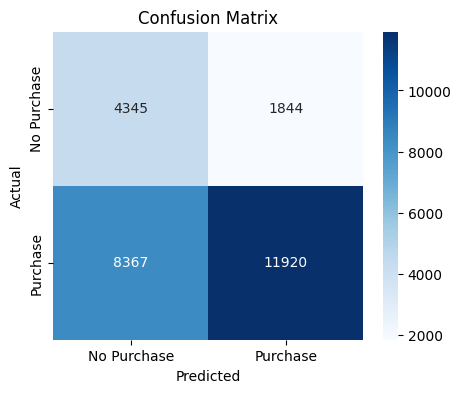

In [36]:

# Step 1: Initialize and train the model
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_resampled_clean, y_train_resampled_clean)
y_pred = log_model.predict(X_test_clean)


# Step 3: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## RANDOM FOREST CLASSIFIER 

Random Forest Accuracy: 0.6288336606738179

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.69      0.46      6189
           2       0.86      0.61      0.72     20287

    accuracy                           0.63     26476
   macro avg       0.61      0.65      0.59     26476
weighted avg       0.74      0.63      0.66     26476



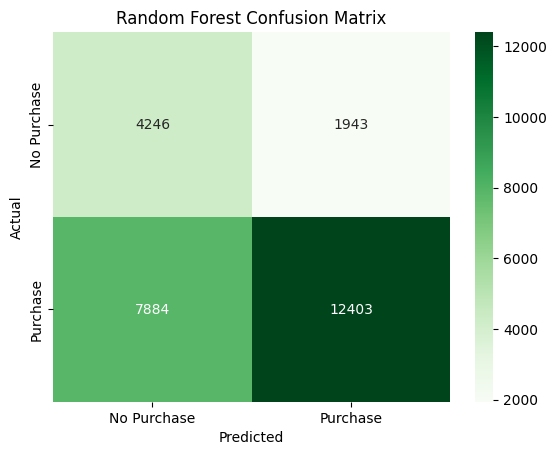

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled_clean, y_train_resampled_clean)
y_pred_rf = rf_model.predict(X_test_clean)


# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
"""# Map class 1 → 1 (purchase), 2 → 0 (no purchase)
y_train_resampled_fixed = y_train_resampled.replace({2: 0})
y_test_fixed = y_test.replace({2: 0})"""


## XGBOOST CLASSIFIER 

/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[13:22:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.6284937301707206

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.69      0.47      6189
           2       0.87      0.61      0.72     20287

    accuracy                           0.63     26476
   macro avg       0.61      0.65      0.59     26476
weighted avg       0.75      0.63      0.66     26476



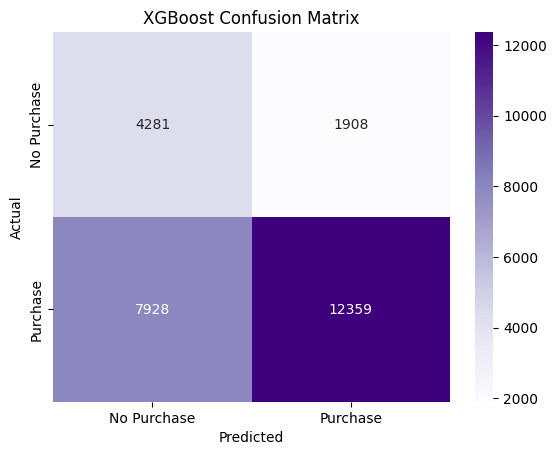

In [42]:
# Run XGBoost with fixed labels
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# XGBoost (remember to fix labels if needed)
y_train_fixed = y_train_resampled_clean.replace({2: 0})
xgb_model.fit(X_train_resampled_clean, y_train_fixed)
y_pred_xgb = xgb_model.predict(X_test_clean)
y_pred_xgb = np.where(y_pred_xgb == 0, 2, 1)  # map back for evaluation

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Using gridsearch cv for SGB for finding the better parameters.

In [39]:
# Step 1: Relabel target values (1 → 1, 2 → 0)
y_train_fixed = y_train_resampled_clean.replace({2: 0})
y_test_fixed = y_test.replace({2: 0})


In [ ]:



# Step 2: Define model and parameter grid
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Step 3: Run grid search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_resampled_clean, y_train_fixed)

# Step 4: Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversio

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best F1 Score: 0.6928642069613201


/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[13:43:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




## Retrain xgb with best parameters and predict the test data 

/Users/muralidharanv/Documents/GUVI /PROJECTS/Cliskstream Customer Conversion/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[14:18:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Test Accuracy: 0.6215818099410787

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.70      0.47      6189
           2       0.87      0.60      0.71     20287

    accuracy                           0.62     26476
   macro avg       0.61      0.65      0.59     26476
weighted avg       0.75      0.62      0.65     26476



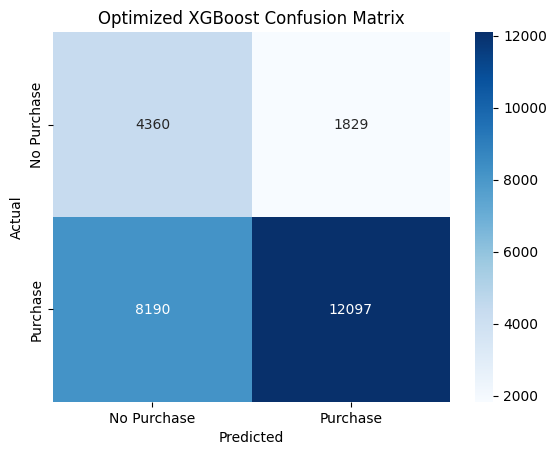

In [40]:
# Re-initialize with best parameters
best_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=250,
    subsample=1.0
)

# Train on balanced, clean data
best_xgb.fit(X_train_resampled_clean, y_train_fixed)

# Predict on test set (leak-free)
y_pred_xgb_best = best_xgb.predict(X_test_clean)

# Convert predictions back to original labels (if needed)
y_pred_xgb_best = np.where(y_pred_xgb_best == 0, 2, 1)

# Evaluate

print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized XGBoost Confusion Matrix")
plt.show()


## REGRESSION MODELING

In [36]:
## creating the revenue coloumn based on the price and purchase column.

# Create simulated revenue column
df_encoded['revenue'] = df_encoded.apply(lambda row: row['price'] if row['purchase'] == 1 else 0, axis=1)


In [37]:
df_encoded

,order,clothing_model,location,photo_type,price,price_above_avg,page,purchase,session_clicks,clicks_per_category,...,colour_Gray,colour_Green,colour_Multicolor,colour_Navy Blue,colour_Olive,colour_Pink,colour_Red,colour_Violet,colour_White,revenue
0,21,88,3,1,48,0,2,1,107,2029,...,0,0,0,0,0,0,0,1,0,48.0
1,6,60,5,0,57,0,2,2,13,65,...,0,0,0,0,0,0,0,1,0,0.0
2,2,80,1,0,48,0,1,2,11,15,...,0,0,1,0,0,0,0,0,0,0.0
3,2,45,0,0,43,1,1,2,8,21,...,0,0,0,0,0,0,0,0,0,0.0
4,16,66,1,0,57,0,2,1,17,130,...,0,0,1,0,0,0,0,0,0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,3,145,3,0,48,0,2,2,8,29,...,0,0,0,0,0,0,0,0,0,0.0
132375,9,94,5,0,28,1,2,2,43,158,...,0,0,0,0,0,0,0,0,1,0.0
132376,4,33,4,1,38,1,1,2,9,44,...,0,0,0,0,0,0,0,0,0,0.0
132377,16,121,1,1,20,1,3,1,24,121,...,0,0,1,0,0,0,0,0,0,20.0


## Removing the leakage feautres and splitting the data set.

In [38]:
# Define leakage and non-regression columns
regression_leakage_features = ['order', 'session_clicks', 'clicks_per_category','click_efficiency', 'purchase']

# Drop those features
X_reg = df_encoded.drop(columns=regression_leakage_features + ['revenue'])
y_reg = df_encoded['revenue']


In [39]:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [46]:

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42, eval_metric='rmse')

# Train models
lr_model.fit(X_train_reg, y_train_reg)
rf_model.fit(X_train_reg, y_train_reg)
xgb_model.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_reg)
y_pred_rf = rf_model.predict(X_test_reg)
y_pred_xgb = xgb_model.predict(X_test_reg)

# Define evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"\n {model_name} Performance:")
    print("R² Score        :", r2_score(y_true, y_pred))
    print("MAE             :", mean_absolute_error(y_true, y_pred))
    print("RMSE            :", np.sqrt(mean_squared_error(y_true, y_pred)))

# Evaluate all models
evaluate(y_test_reg, y_pred_lr, "Linear Regression")
evaluate(y_test_reg, y_pred_rf, "Random Forest Regressor")
evaluate(y_test_reg, y_pred_xgb, "XGBoost Regressor")



 Linear Regression Performance:
R² Score        : 0.0851472828689791
MAE             : 14.287512792755294
RMSE            : 17.969964539843286

 Random Forest Regressor Performance:
R² Score        : 0.09424271810382157
MAE             : 13.686764472748507
RMSE            : 17.88041300988708

 XGBoost Regressor Performance:
R² Score        : 0.09745463930551101
MAE             : 13.73951595148731
RMSE            : 17.848681836944376


### Using Gridsearchcv for finding the best paramenters for the model.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200,275,300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}        

# Initialize model
xgb_reg = XGBRegressor(random_state=42, eval_metric='rmse')

# Grid search with 3-fold cross-validation
grid_reg = GridSearchCV(estimator=xgb_reg,
                        param_grid=param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=3,
                        verbose=1,
                        n_jobs=-1)

# Fit on training data
grid_reg.fit(X_train_reg, y_train_reg)

# Best params and score
print("Best Parameters:", grid_reg.best_params_)
print("Best RMSE Score (CV):", -grid_reg.best_score_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 275, 'subsample': 1.0}
Best RMSE Score (CV): 17.895213562781993


### using best parameters and evaluating the test set.

In [ ]:
# Re-train final model
best_xgb_reg = XGBRegressor(
    random_state=42,
    eval_metric='rmse',
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=275,
    subsample=1.0
)

best_xgb_reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_best_reg = best_xgb_reg.predict(X_test_reg)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Test R² Score:", r2_score(y_test_reg, y_pred_best_reg))
print("Test MAE     :", mean_absolute_error(y_test_reg, y_pred_best_reg))
print("Test RMSE    :", np.sqrt(mean_squared_error(y_test_reg, y_pred_best_reg)))


Test R² Score: 0.10061332750436625
Test MAE     : 13.835757497249398
Test RMSE    : 17.81742144975431


## Now Clustering the dataset 

In [40]:
# Starting by dropping unnecessary columns
clustering_df = df_encoded.drop(columns=[
    'session_id',           # identifier
    'order',                # leaked target logic
    'purchase',             # target
    'revenue',              # regression target
    'clicks_per_category',  # derived from order
    'session_clicks',
    'click_efficiency',
    'clothing_model'        # ID-level feature
], errors='ignore')  # ignore in case already dropped


In [41]:
# Define columns that are definitely useful for clustering
core_clustering_cols = [
    'price', 'page', 'price_above_avg', 'is_high_price',
    'bounce', 'location', 'photo_type'
]

# Include all one-hot encoded columns for:
# - colour
# - country
# - main_category

ohe_cols = [col for col in clustering_df.columns if any(
    col.startswith(prefix) for prefix in ['colour_', 'country_', 'main_category_'])]

# Final feature set
final_clustering_cols = core_clustering_cols + ohe_cols

# Filter the clustering dataset
clustering_df = clustering_df[final_clustering_cols]
clustering_df

,price,page,price_above_avg,is_high_price,bounce,location,photo_type,country_Lithuania,country_Other,country_Poland,...,colour_Burgundy,colour_Gray,colour_Green,colour_Multicolor,colour_Navy Blue,colour_Olive,colour_Pink,colour_Red,colour_Violet,colour_White
0,48,2,0,0,0,3,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,57,2,0,1,0,5,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,48,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,43,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,57,2,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,48,2,0,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132375,28,2,1,0,0,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
132376,38,1,1,0,0,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132377,20,3,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Scaling the dataframe for better clusterring

In [42]:

scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_df)




### KMeans + Elbow Method

In [43]:
# Run KMeans for k from 1 to 10
sse = []  # Sum of Squared Errors (inertia)
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_scaled)
    sse.append(kmeans.inertia_)  # inertia = SSE


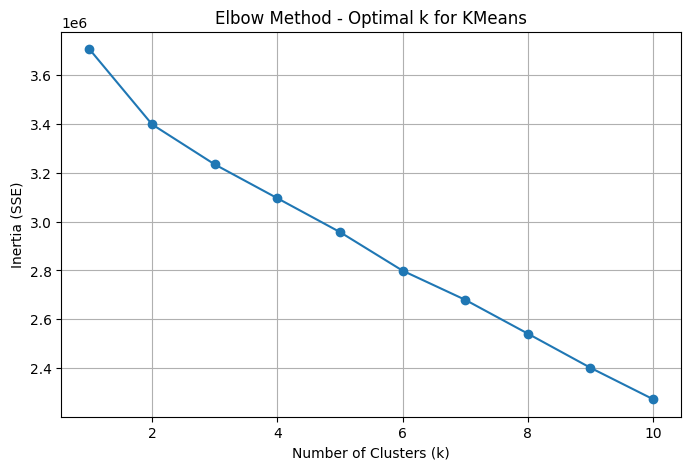

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method - Optimal k for KMeans')
plt.grid(True)
plt.show()


In [45]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(clustering_scaled)

# Add cluster labels to the original (unscaled) DataFrame
df_encoded['cluster'] = clusters

In [46]:
# Example: View average values for each cluster
cluster_profiles = df_encoded.groupby('cluster').mean(numeric_only=True)
print(cluster_profiles[['price', 'page', 'bounce', 'is_high_price', 'price_above_avg']])


             price      page    bounce  is_high_price  price_above_avg
cluster                                                               
0        59.352333  1.496907  0.164787       0.759578         0.000000
1        37.221186  1.802950  0.137575       0.000000         0.694591


/var/folders/q9/1vgcrp_s61j9_p6vmrcdf1h00000gn/T/ipykernel_5486/1942950389.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




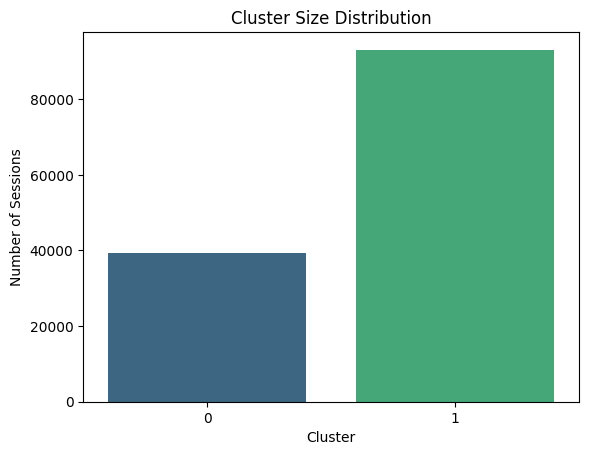

In [47]:
# Compare cluster sizes
sns.countplot(data=df_encoded, x='cluster', palette='viridis')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Sessions")
plt.show()


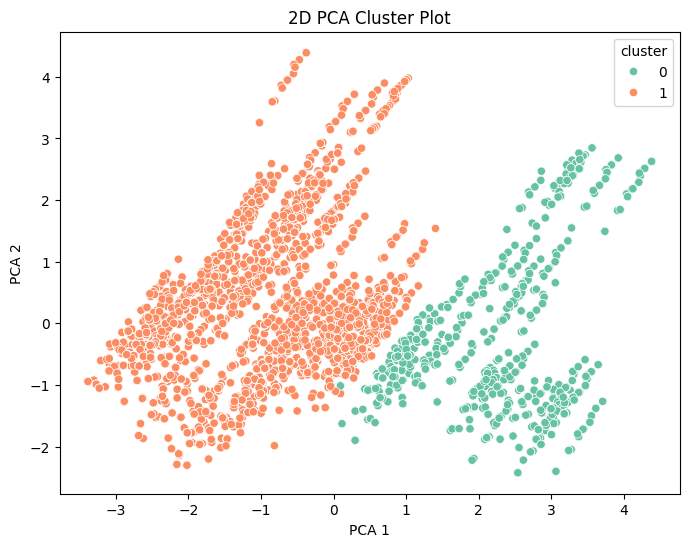

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_scaled)

df_encoded['pca1'] = pca_result[:, 0]
df_encoded['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("2D PCA Cluster Plot")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [49]:

# clustering_scaled: your scaled features
# clusters: the labels from KMeans

# 1. Silhouette Score
sil_score = silhouette_score(clustering_scaled, clusters)
print("Silhouette Score:", sil_score)

# 2. Davies-Bouldin Index
dbi = davies_bouldin_score(clustering_scaled, clusters)
print("Davies-Bouldin Index:", dbi)

# 3. Inertia (WCSS) — already available from KMeans
print("Within-Cluster Sum of Squares (Inertia):", kmeans.inertia_)


Silhouette Score: 0.11779776365798386
Davies-Bouldin Index: 2.8873135209893612
Within-Cluster Sum of Squares (Inertia): 3398534.205846167


### changing the cluster and improving the accuracy

In [55]:
# Run KMeans with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(clustering_scaled)

# Store cluster labels
df_encoded['cluster_k3'] = clusters_3

# Silhouette Score
silhouette_k3 = silhouette_score(clustering_scaled, clusters_3)
print("Silhouette Score (k=3):", silhouette_k3)

# Davies-Bouldin Index
dbi_k3 = davies_bouldin_score(clustering_scaled, clusters_3)
print("Davies-Bouldin Index (k=3):", dbi_k3)

# Inertia (WCSS)
print("Within-Cluster Sum of Squares (k=3):", kmeans_3.inertia_)

# Get mean behavior per cluster
print(df_encoded.groupby('cluster_k3').mean(numeric_only=True)[[
    'price', 'page', 'bounce', 'is_high_price', 'price_above_avg']])



Silhouette Score (k=3): 0.10052559918744826
Davies-Bouldin Index (k=3): 3.1890769237718692
Within-Cluster Sum of Squares (k=3): 3234624.239708184
                price      page    bounce  is_high_price  price_above_avg
cluster_k3                                                               
0           37.443168  1.394744  0.178691       0.000000         0.901514
1           60.687877  1.569739  0.157904       0.878266         0.000000
2           38.661324  2.155721  0.101293       0.006024         0.388765
